In [1]:
%run supportvectors-common.ipynb 



<div style="color:#aaa;font-size:8pt">
<hr/>

 </blockquote>
 <hr/>
</div>



# Center Limit Theorem

The center limit theorem is one of the crown jewels in data science; when we first encounter it, sometimes, it seems implausible that this would happen. And yet, after more mature reflection, one gains a better appreciation of why it works.

The key observation is this: consider sufficiently large dataset, with an arbitrary probability distribution. The crucial point here is -- there is no requirement that this data's distribution should be normal. It can be anything.

Now take *lots of* random samples from the population, i.e. the whole dataset. Now, compute the mean of these independent samples. 

The theorem states that if we plot these means, they will show a "bell-curve", i.e. normal distribution always, irrespective of the underlying distribution of the original dataset or population.

<div class="alert-box alert-info" style="padding-top:30px">

<h4> Some technicalities</h4>
  
    
> There is an underlying assumption about the process of sampling from the population:
> if we imagine *taking a random sample* from the population, then we must **replace the sampled items back into the population**. More practically, each sample contains items freely taken from the population, without worrying that other samples may contain some of these items. In other words, overlap is allowed.
> 
> **IID**: Secondly, when we say take random samples, we can be more precise. We sample in such a way that each item in the sample is independently taken (without being influenced by the already selected items in the sample ), and the probability distribution of the sample should be identical to that of the population. This in practice simply means sample randomly from population, and try to avoid bias. (For example, if you are taking samples of people, and measuring their height, then it would not be a good idea of building samples only from people we find playing on the basketball court. In this case, the sample height distribution would not reflect the underlying height distribution of the larger population. This requirement is often abbreviated as **IID**: independent and identically distributed samples.)
>
> In other words, random sampling and IID sampling are synonymous.
>
    
</div>

Learn more about it from the excellent 3Blue1Brown's Youtube video: https://www.youtube.com/watch?v=zeJD6dqJ5lo&t=267s&ab_channel=3Blue1Brown

We will start with a few imports needed. After that, we will sample from a small set of different distributions, and see the theorem in action.

In [2]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (15,8)
GAZILLION = 1_000_000

## The Normal distribution

We are all familiar with the "bell-curve": it forms a good place to start. Let us remind ourself of the first four moments of this distribution (mean, variance, skew, kurtosi). 

In [3]:
# Normal distribution
from scipy.stats import norm

In [4]:
# Calculate the first four moments
mean, var, skew, kurt = norm.stats(moments='mvsk')

print(f' Mean: {mean}\n Variance: {var}\n Skew: {skew},\n Kurtosis: {kurt}')

 Mean: 0.0
 Variance: 1.0
 Skew: 0.0,
 Kurtosis: 0.0


Let us sample a lot of random variates from this distribution:

In [5]:
x = norm.rvs(size=GAZILLION)

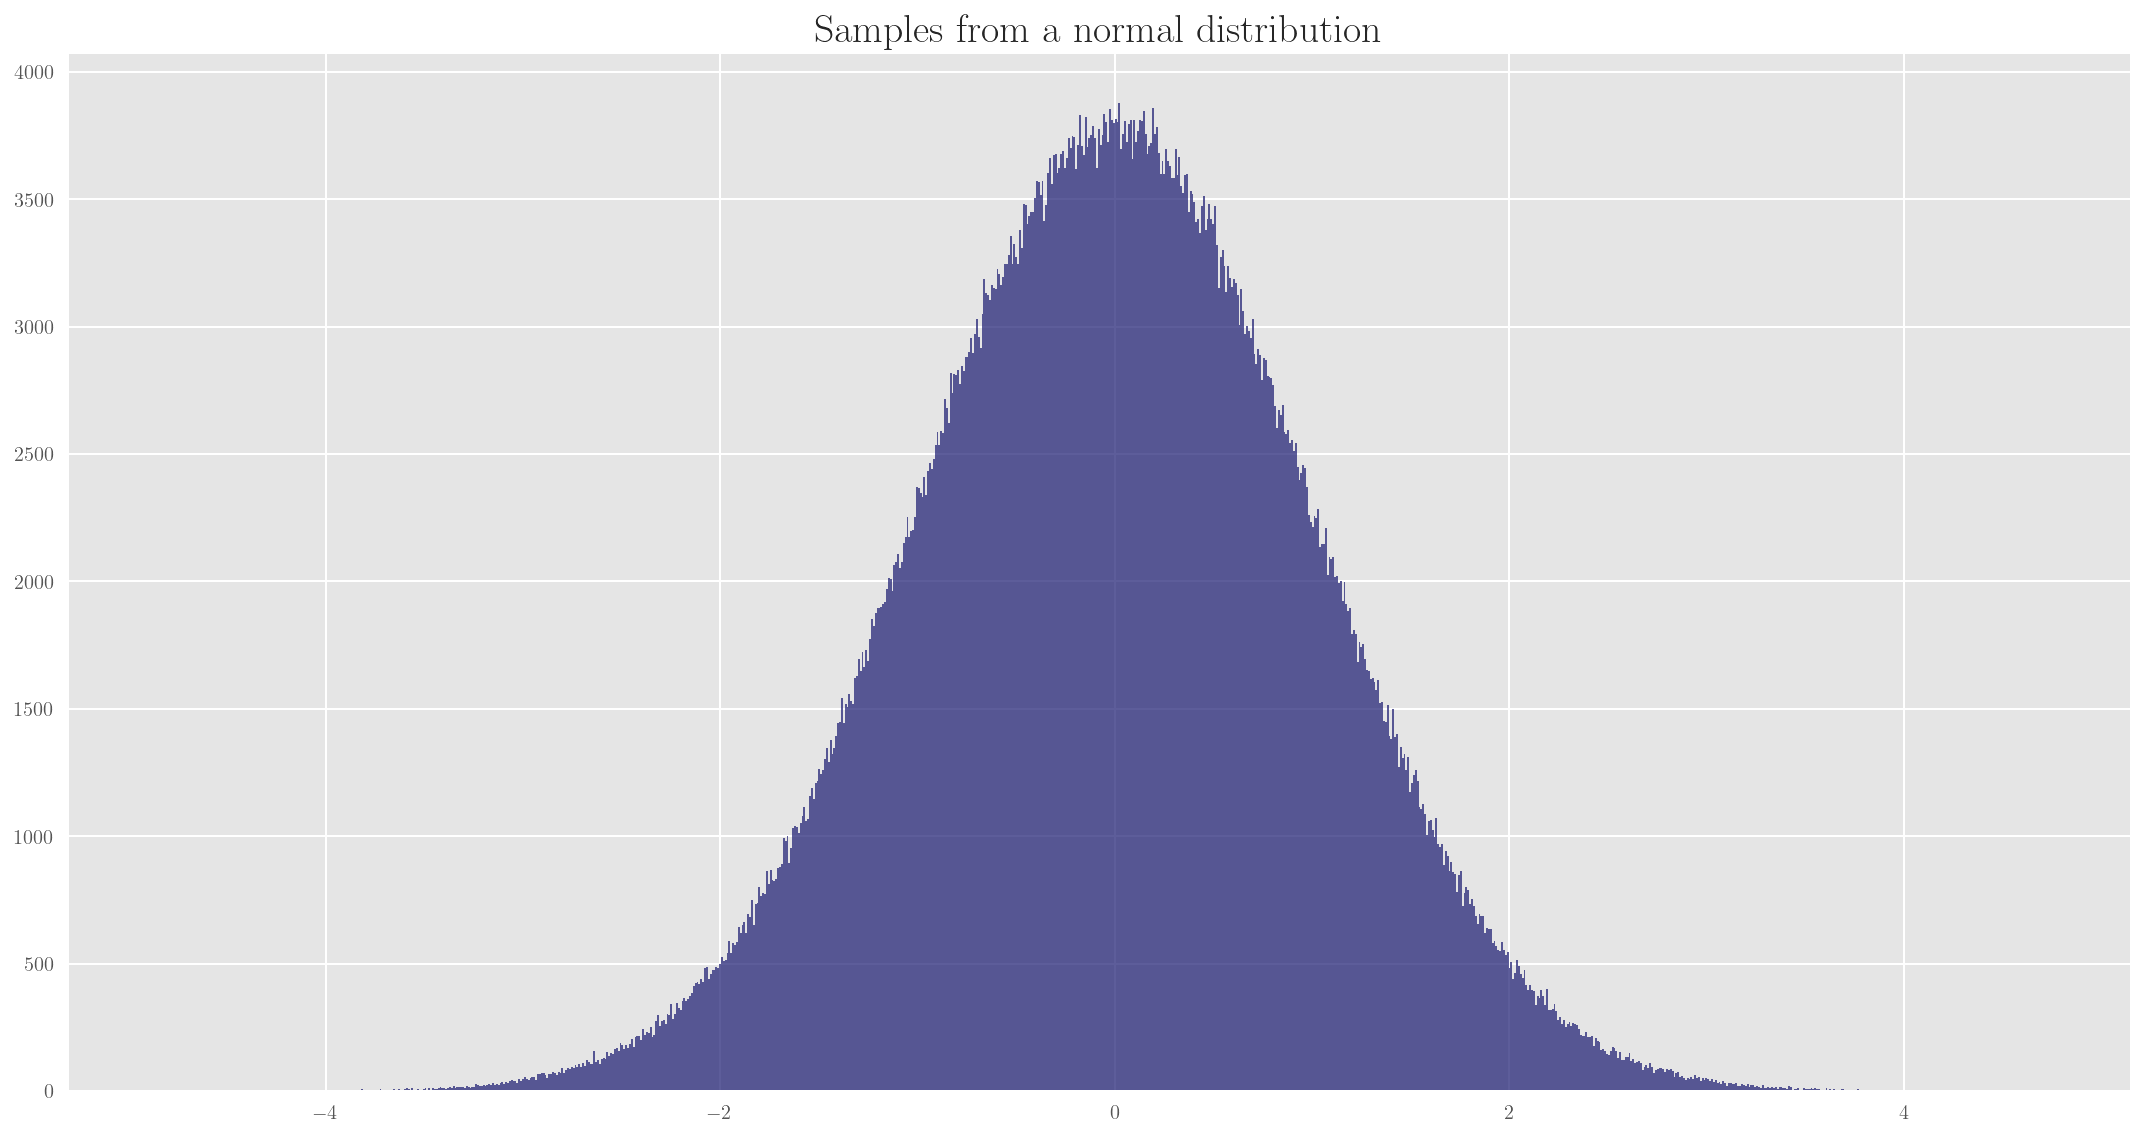

In [6]:
plt.hist(x,bins=1000, color='midnightblue', alpha=0.7);
plt.title(r'Samples from a normal distribution', fontsize=20)
plt.tight_layout()

Now, let us find the means of lots of samples from this distribution:

In [7]:
samples = [norm.rvs(size=100) for _ in range(GAZILLION)]

In [8]:
means = [np.mean(sample) for sample in samples]

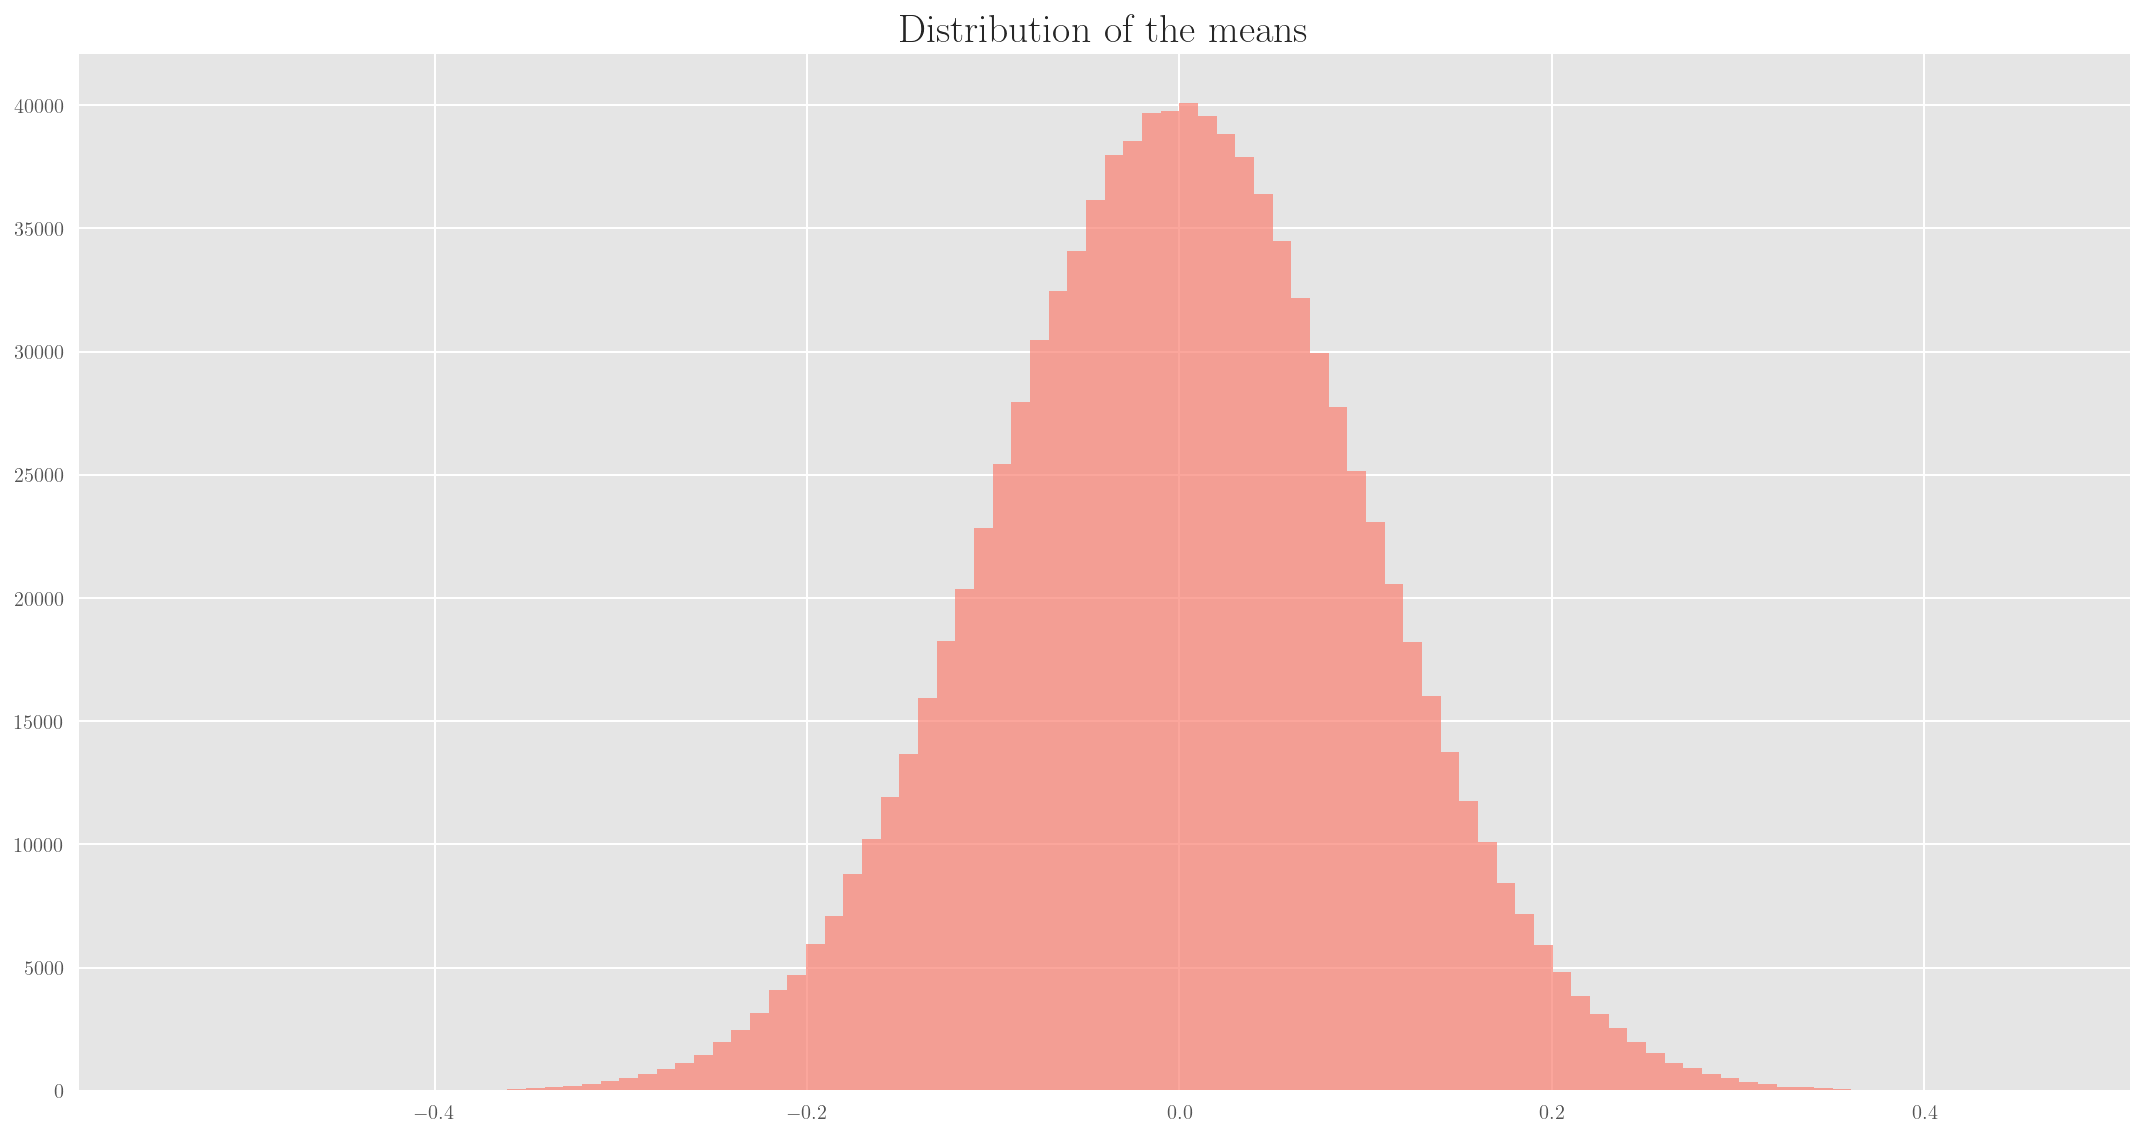

In [9]:
plt.hist(means, bins=100, color='salmon', alpha=0.7);
plt.title(r'Distribution of the means', fontsize=20)
plt.tight_layout()

Perhaps, we may be inclined to argue, that this happened because we started with a population whose underlying probability distribution was normal to begin with. Let us now see that this is not so: samples taken from any other distribution will exhibit the same behavior. We will see this for two specific distributions:

* **Uniform distribution** where every value has the same probability density
* **Beta distribution**, a flexible distribution that occurs at is implicated in many, many phenomena

In [10]:
## Let us now do it for different distributions

from scipy.stats import uniform, beta


## Unform distribution

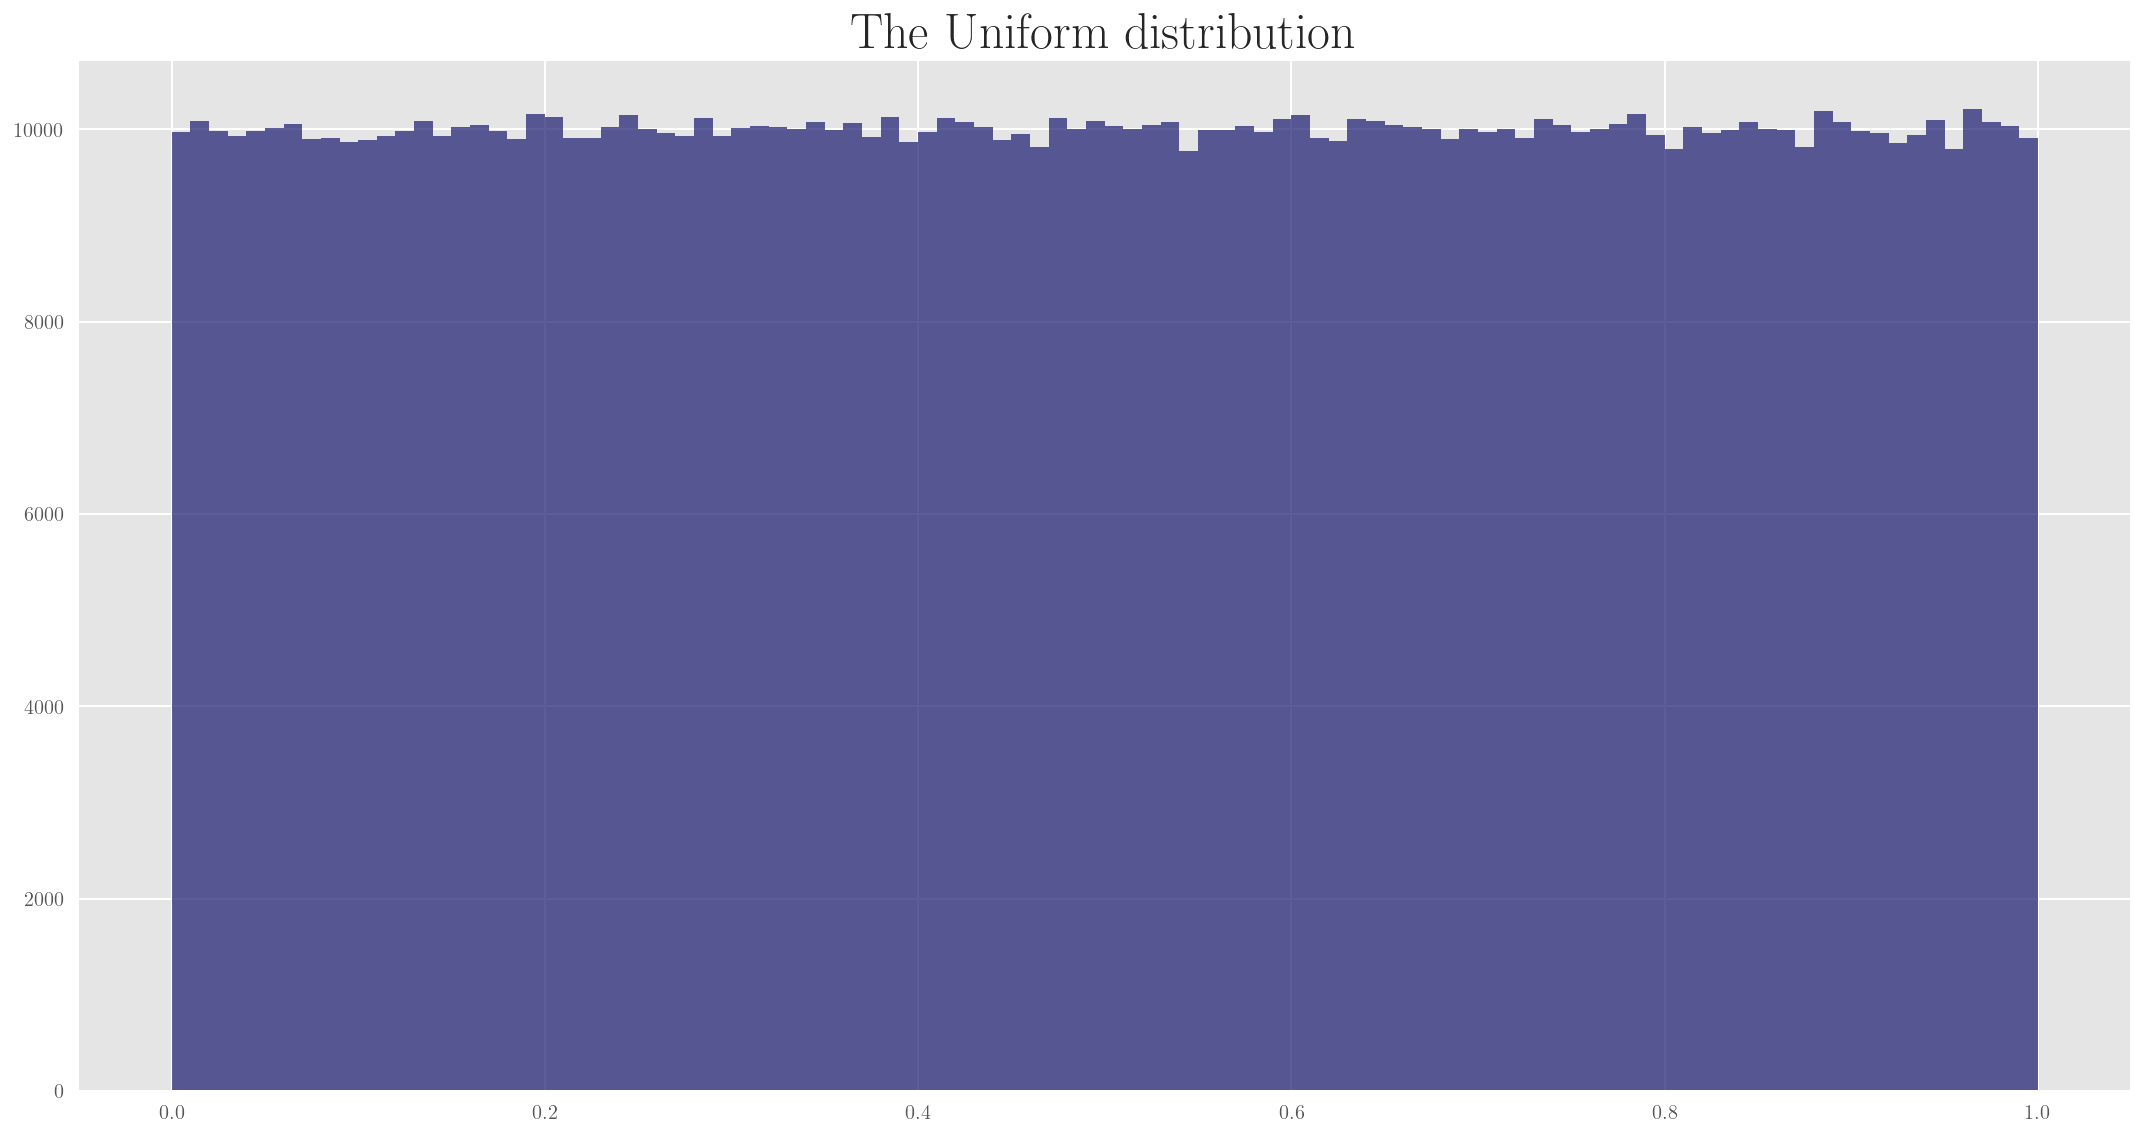

In [11]:


x_uni = uniform.rvs(size=GAZILLION)
plt.hist(x_uni, bins=100, color='midnightblue', alpha=0.7)
plt.title(r'The Uniform distribution', fontsize=25)
plt.tight_layout()

### Distribution of the sample means

Now, let us find the means of lots of samples from this distribution. Note that the uniform distribution, as the name suggests, is a flat distribution of probabilities.

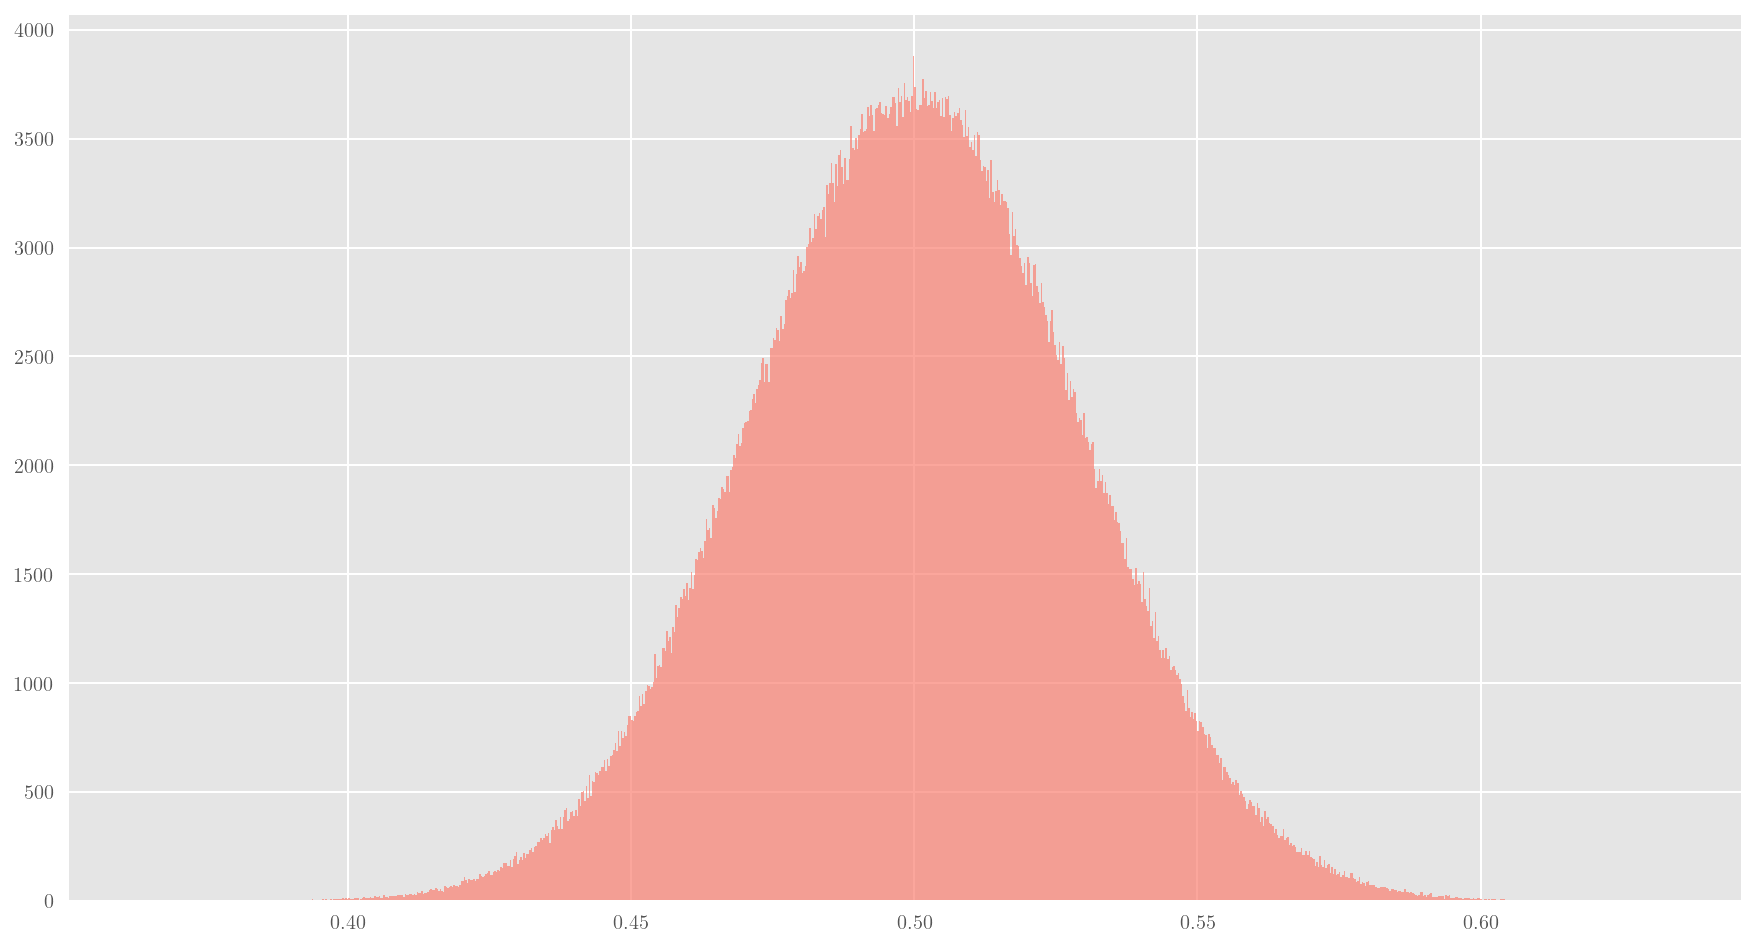

In [12]:
# Draw a lot so samples from this distribution
samples = [uniform.rvs(size=100) for _ in range(GAZILLION)]

# Find the mean of each of the samples
means = [np.mean(sample) for sample in samples]

# Plot the means
plt.hist(means, bins=1000, color='salmon', alpha=0.7);

## Beta distribution

The beta distribution  has two parameters that control its shape.

In [13]:
a, b = 2, 10


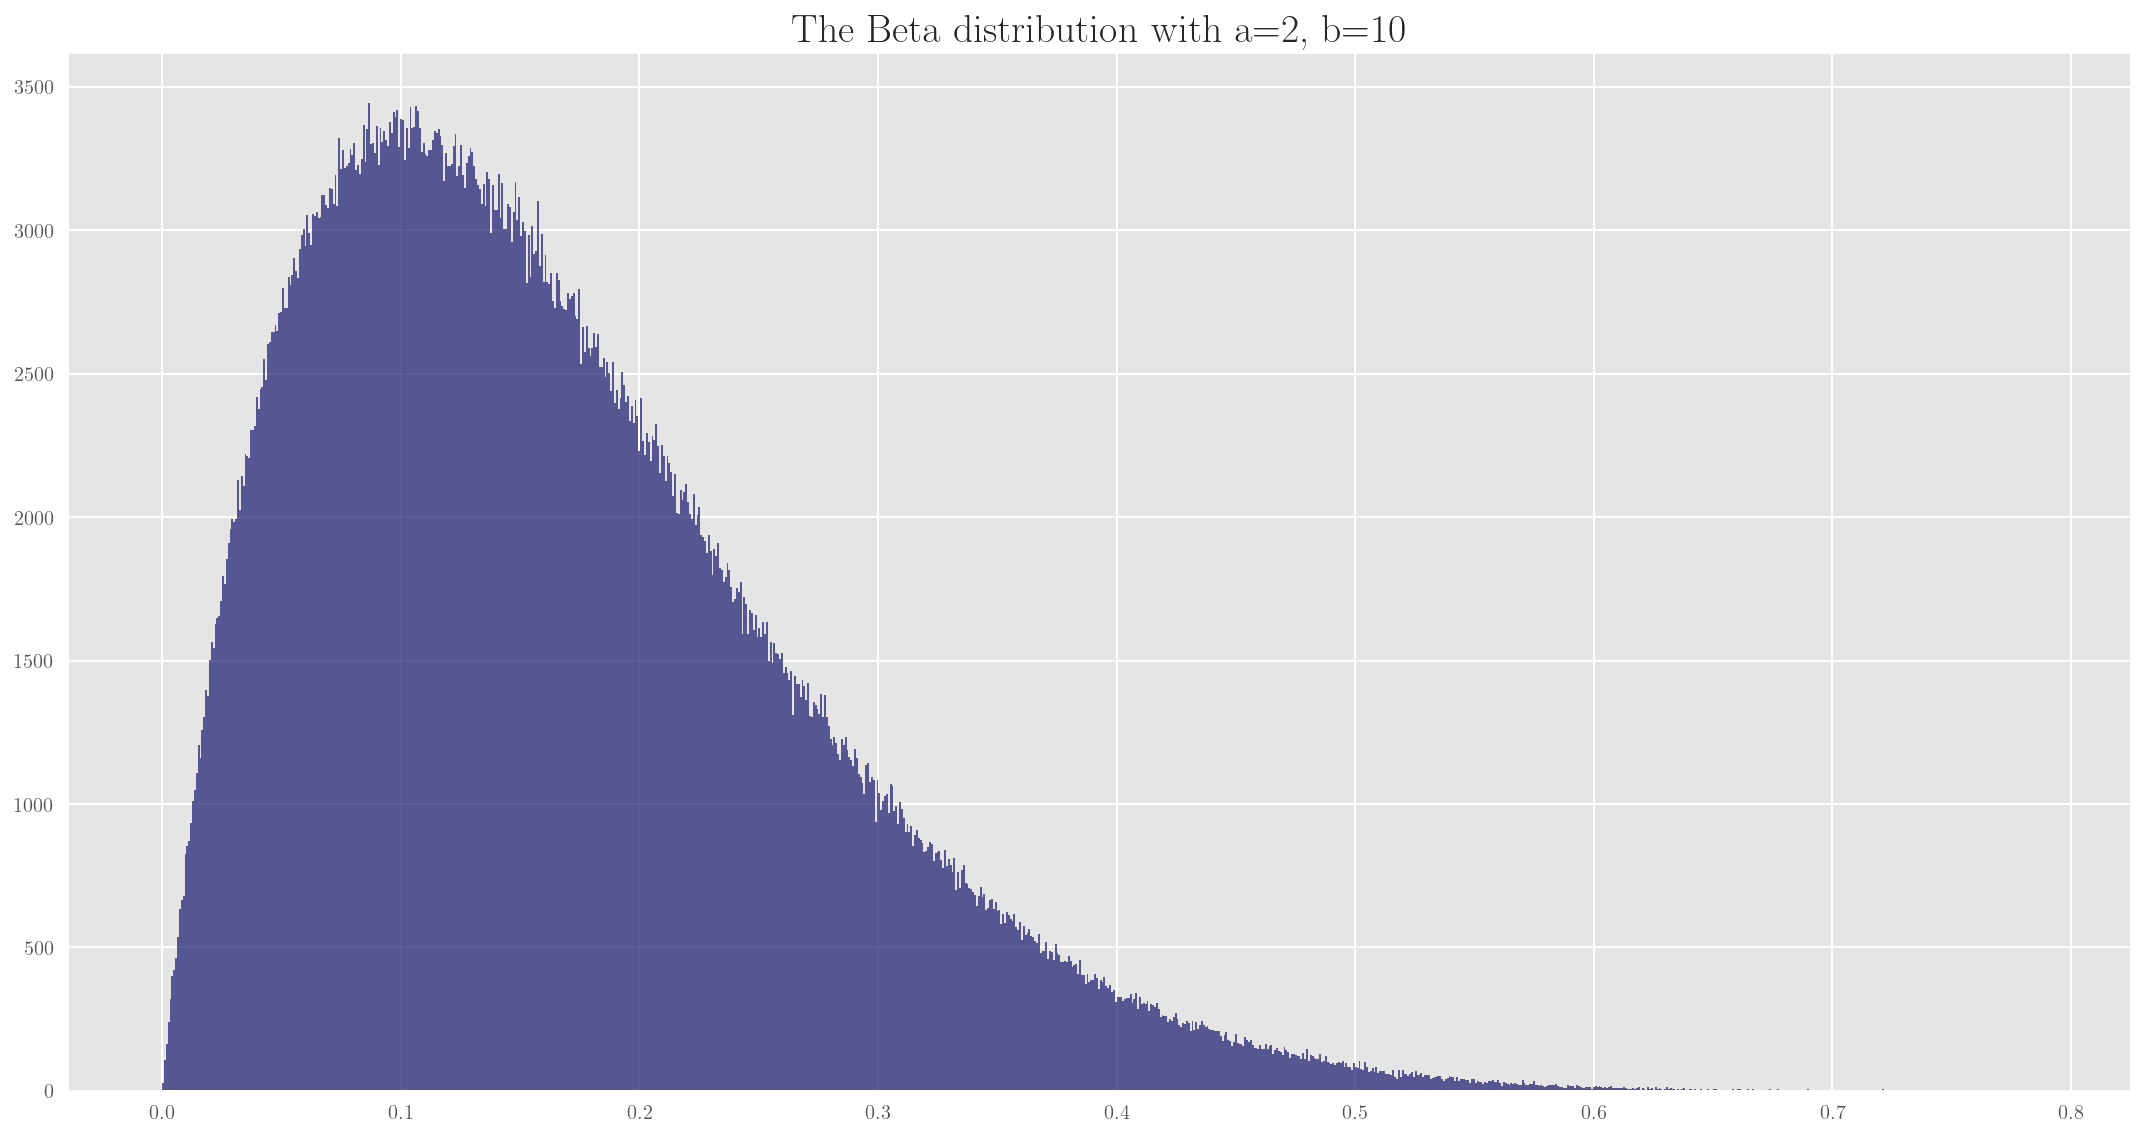

In [14]:

x_uni = beta.rvs(a=a, b=b, size=GAZILLION)
plt.hist(x_uni, bins=1000, color='midnightblue', alpha=0.7)
plt.title(rf'The Beta distribution with a={a}, b={b}', fontsize=20)
plt.tight_layout()

In [15]:
# Calculate the first four moments
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')

print(f' Mean: {mean}\n Variance: {var}\n Skew: {skew},\n Kurtosis{kurt}')

 Mean: 0.16666666666666666
 Variance: 0.010683760683760684
 Skew: 0.9214008855198341,
 Kurtosis0.7885714285714286


### Distribution of the sample means

Now, let us find the means of lots of samples from this distribution. 

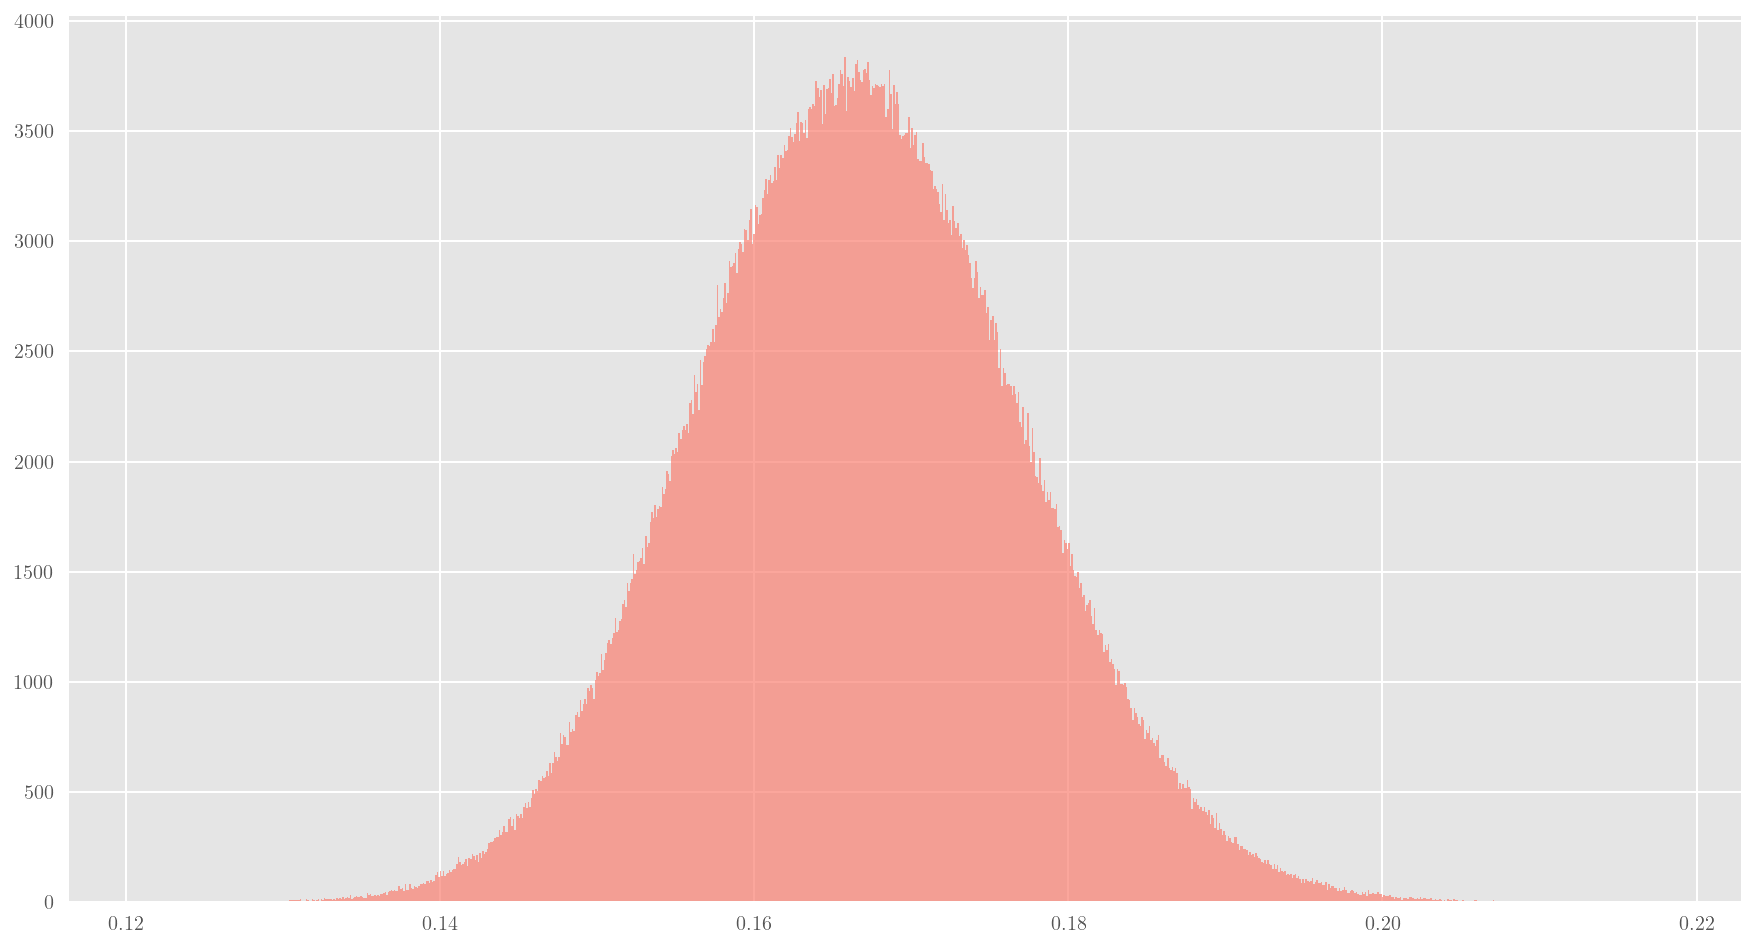

In [16]:
# Draw a lot so samples from this distribution
samples = [beta.rvs(a=a, b=b, size=100) for _ in range(GAZILLION)]

# Find the mean of each of the samples
means = [np.mean(sample) for sample in samples]

# Plot the means
plt.hist(means, bins=1000, color='salmon', alpha=0.7);

### Another variation of this distribution

Let us consider other shapes we can get by changing the parameters.

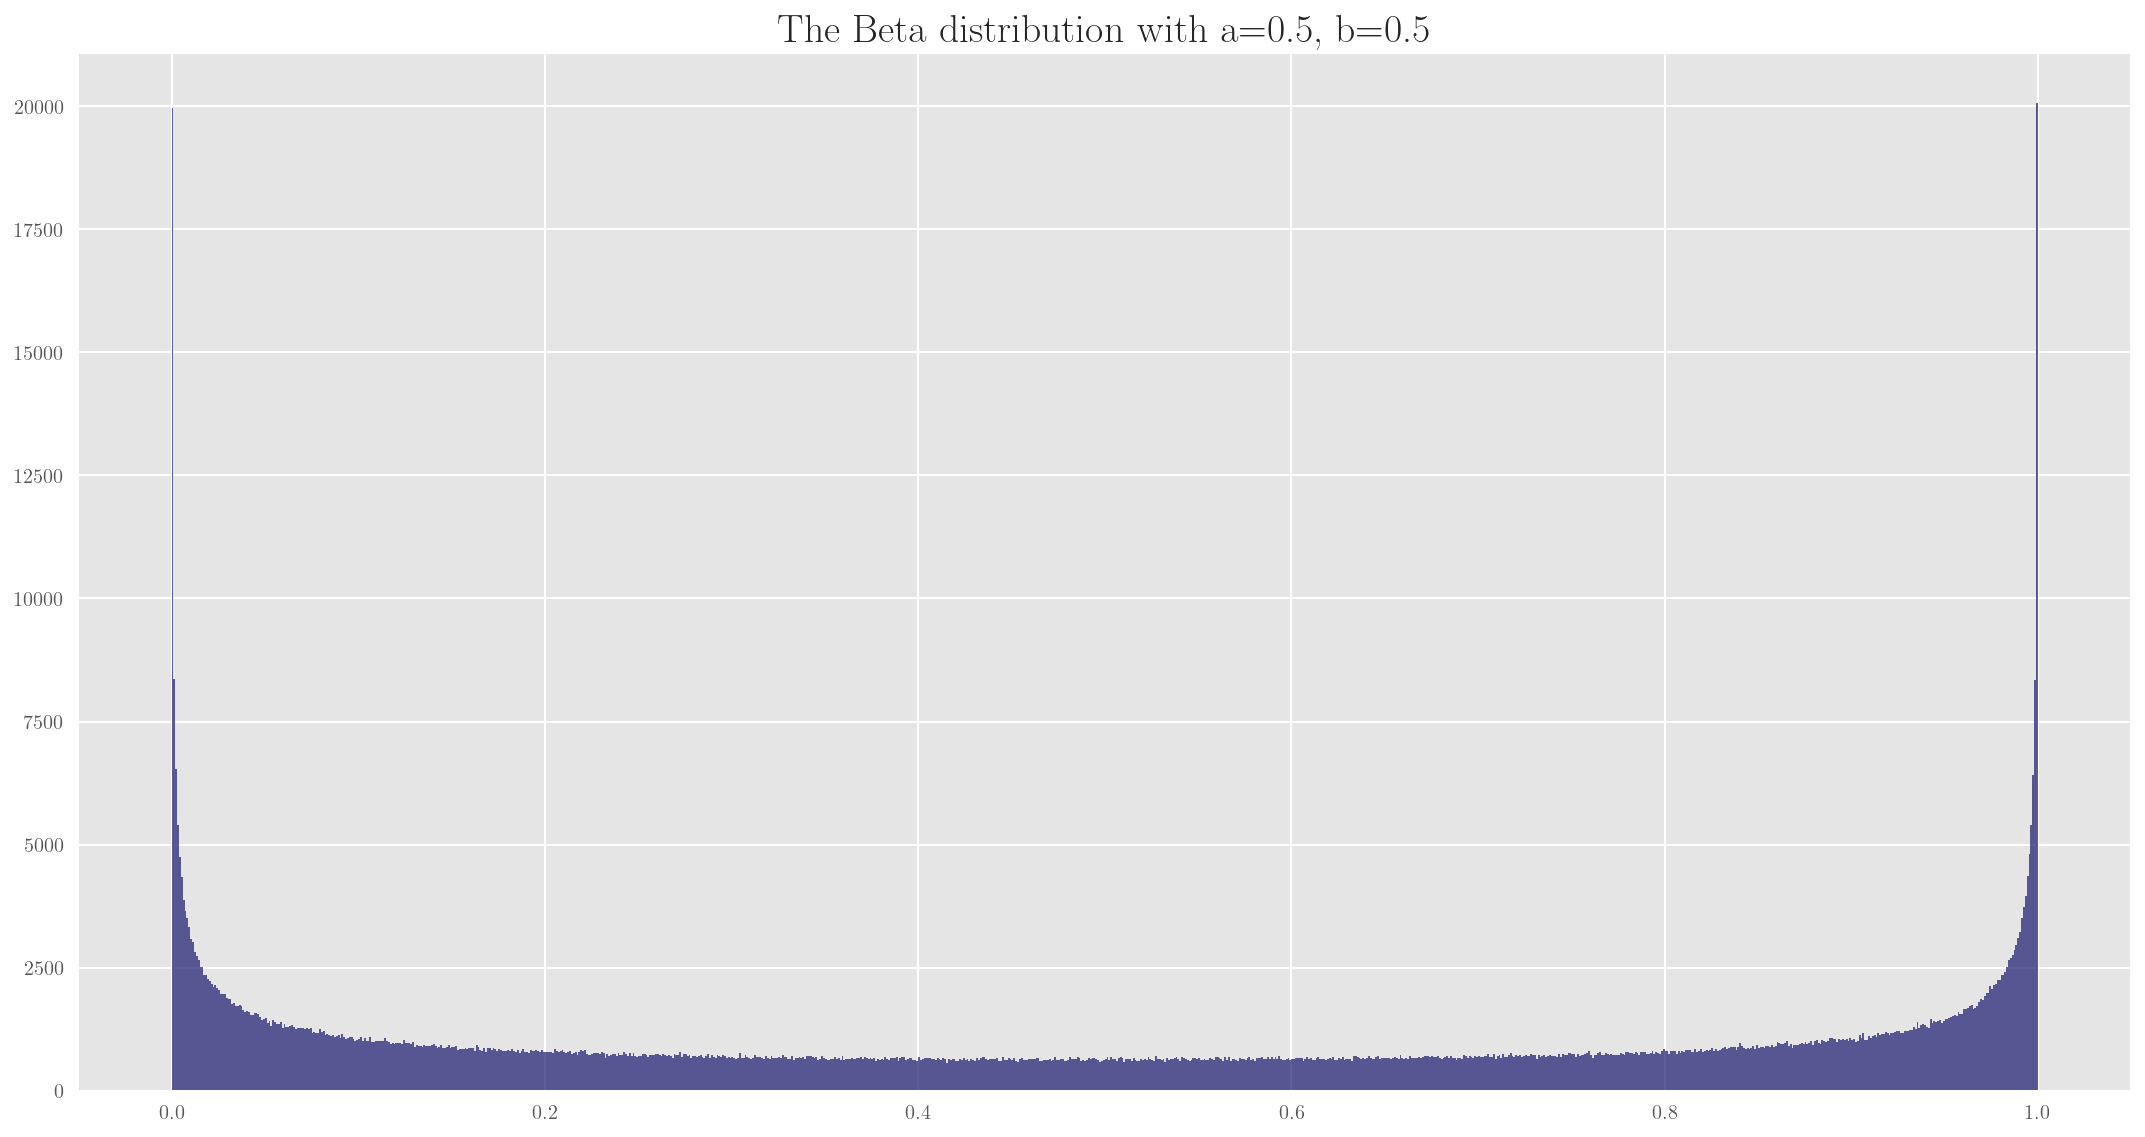

In [17]:
a = b = 0.5
x_uni = beta.rvs(a=a, b=b, size=GAZILLION)
plt.hist(x_uni, bins=1000, color='midnightblue', alpha=0.7)
plt.title(rf'The Beta distribution with a={a}, b={b}', fontsize=20)
plt.tight_layout()

In [18]:
# Calculate the first four moments
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')

print(f' Mean: {mean}\n Variance: {var}\n Skew: {skew},\n Kurtosis: {kurt}')

 Mean: 0.5
 Variance: 0.125
 Skew: 0.0,
 Kurtosis: -1.5


### Distribution of the sample means

Now, let us find the means of lots of samples from this distribution. 

Text(0.5, 1.0, 'Distribution of the sample means')

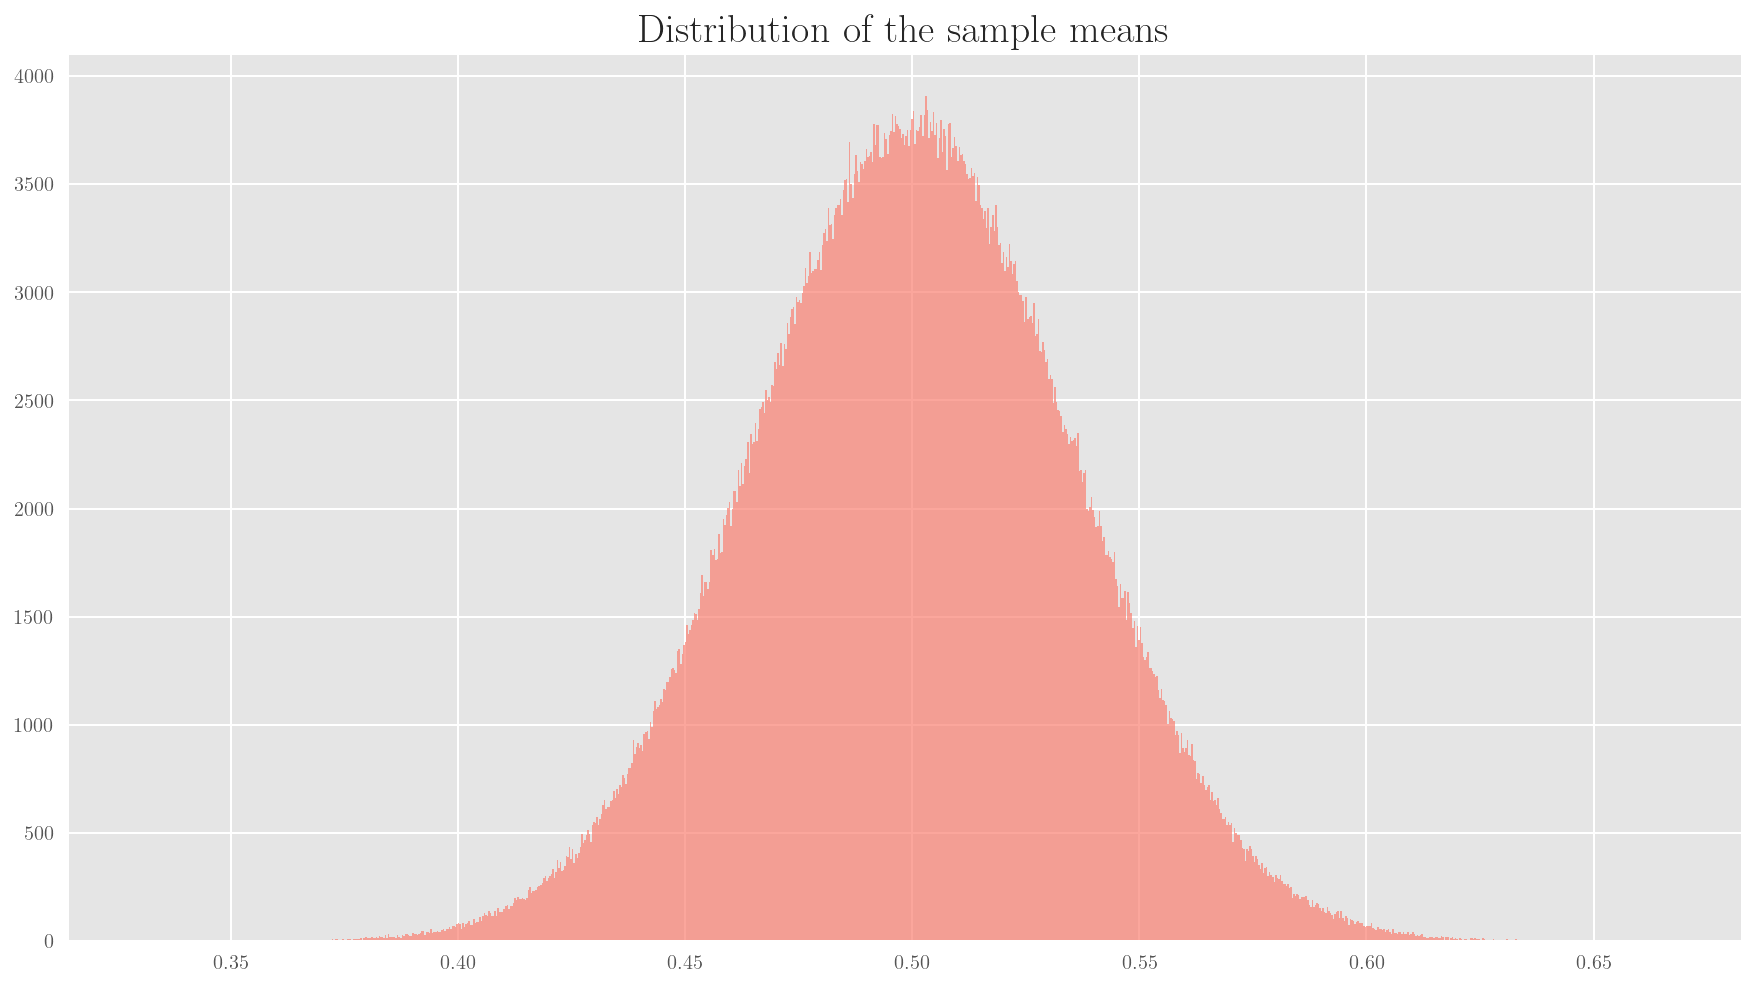

In [19]:
# Draw a lot of samples from this distribution
samples = [beta.rvs(a=a, b=b, size=100) for _ in range(GAZILLION)]

# Find the mean of each of the samples
means = [np.mean(sample) for sample in samples]

# Plot the means
plt.hist(means, bins=1000, color='salmon', alpha=0.7);
plt.title(r'Distribution of the sample means', fontsize=20)